In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO

# Завантажуємо набір даних Iris
iris = load_iris()
X, y = iris.data, iris.target

# Розбиваємо дані на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Ініціалізуємо та тренуємо RidgeClassifier
clf = RidgeClassifier(tol=1e-2, solver="sag")
clf.fit(X_train, y_train)

# Прогнозуємо тестові дані
y_pred = clf.predict(X_test)

In [22]:
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'), 4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred, average='weighted'), 4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'), 4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, y_pred), 4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred))

Accuracy: 0.7556
Precision: 0.8333
Recall: 0.7556
F1 Score: 0.7503
Cohen Kappa Score: 0.6431
Matthews Corrcoef: 0.6831
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.44      0.59        18
           2       0.50      0.91      0.65        11

    accuracy                           0.76        45
   macro avg       0.80      0.78      0.75        45
weighted avg       0.83      0.76      0.75        45



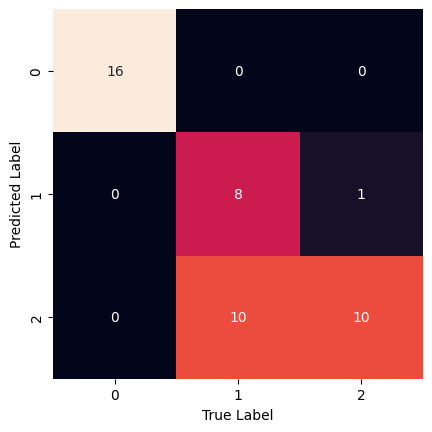

In [23]:
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Збереження графіка як JPG
plt.savefig("Confusion.jpg")

# Збереження як SVG у буфер
f = BytesIO()
plt.savefig(f, format="svg")
plt.show()